In [35]:
import pandas as pd
import numpy as np
from numpy.random import multivariate_normal as gauss2d
import matplotlib.pyplot as plt

Each cluster has three attributes: 
- $\pi$ ... the rate of the cluster size
- $\mu$ ... the mean vector of the cluster
- $\Sigma$ ... the variance-covariance matrix of the cluster

cluster 0
$$
\pi_0 = \frac{800}{3000} \quad
\mu_0 = \left[
\begin{array}{ll}
    -2 \\
    0 
\end{array}
\right] \quad
\Sigma_0 = \left[
\begin{array}{ll}
    1 & 2 \\
    2 & 9
\end{array}
\right]
$$

cluster 1
$$
\pi_1 = \frac{1000}{3000} \quad
\mu_1 = \left[
\begin{array}{ll}
    10 \\
    -6 
\end{array}
\right] \quad
\Sigma_1 = \left[
\begin{array}{ll}
    2 & 1 \\
    1 & 3
\end{array}
\right]
$$

cluster 2
$$
\pi_2 = \frac{1200}{3000} \quad
\mu_2 = \left[
\begin{array}{ll}
    8 \\
    9 
\end{array}
\right] \quad
\Sigma_2 = \left[
\begin{array}{ll}
    2 & 1 \\
    1 & 2
\end{array}
\right]
$$

In [36]:
num_clusters = 3
cluster_sizes = (800, 1000, 1200)
num_samples = sum(cluster_sizes)

# cluster 0
mu = [-2, 0]
sigma = [[1, 2], [2, 9]]
c0 = gauss2d(mu, sigma, cluster_sizes[0])

# cluster 1
mu = [10, -6]
sigma = [[2, 1], [1, 3]]
c1 = gauss2d(mu, sigma, cluster_sizes[1])

# cluster 2
mu = [8, 9]
sigma = [[2, 1], [1, 2]]
c2 = gauss2d(mu, sigma, cluster_sizes[2])

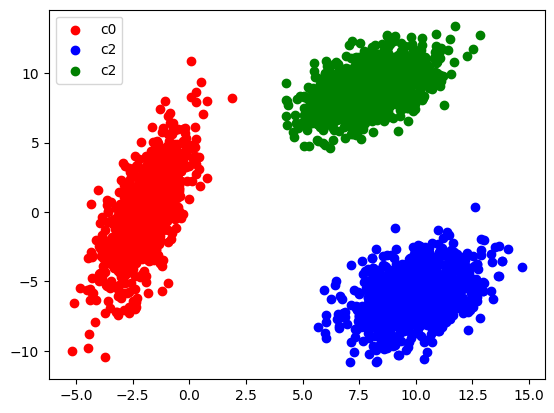

In [37]:
fig, ax = plt.subplots(ncols=1, nrows=1)

ax.scatter(c0[:, 0], c0[:, 1], color='red', label='c0')
ax.scatter(c1[:, 0], c1[:, 1], color='blue', label='c2')
ax.scatter(c2[:, 0], c2[:, 1], color='green', label='c2')
ax.legend()

In [38]:
data = np.zeros((num_samples, 3))

data[:cluster_sizes[0], :2] = c0
data[:cluster_sizes[0], 2] = 0
data[cluster_sizes[0] : cluster_sizes[0]+cluster_sizes[1], :2] = c1
data[cluster_sizes[0] : cluster_sizes[0]+cluster_sizes[1], 2] = 1
data[cluster_sizes[0]+cluster_sizes[1]:, :2] = c2
data[cluster_sizes[0]+cluster_sizes[1]:, 2] = 2

rng = np.random.default_rng()
data = rng.permutation(data, axis=0)

In [39]:
path = 'sample_data.csv'
pd.DataFrame(data, columns=None).to_csv(path, index=None, header=['x', 'y', 'label'])